In [1]:
import graphlab

In [2]:
# Limit number of worker processes. This preserves system memory, which prevents hosted notebooks from crashing.
graphlab.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 4)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1547619105.log


This non-commercial license of GraphLab Create for academic use is assigned to qlrqod55@gmail.com and will expire on January 16, 2020.


In [3]:
sales = graphlab.SFrame('home_data.gl/')

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [4]:
train_data,test_data = sales.random_split(.8,seed=0)

In [5]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.012042     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

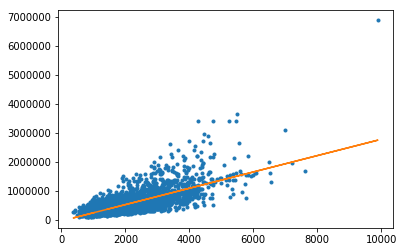

In [7]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

# Quiz

## 문제1. 평균 집값이 가장 높은 지역의 zipcode?

In [9]:
graphlab.canvas.set_target('ipynb')
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

#### 98039 is the most expensive zipcode.

## 문제2. 위 지역의 평균 집값은 얼마인가?

In [12]:
sales[sales['zipcode'] == 98039].mean()

TypeError: Unexpected data source. Possible data source types are: list, numpy.ndarray, pandas.Series, and string(url)